Revenue Analysis

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import math

In [2]:
df_app = pd.read_csv("D:\\Тестові_завдання\\Universe\\test1_app_events.csv")
df_app.shape

(203401, 3)

In [3]:
df_pay = pd.read_csv("D:\\Тестові_завдання\\Universe\\test1_payments.csv")
df_pay.shape

(35410, 3)

In [4]:
df = pd.merge(df_app, df_pay, on = 'user_id', how = 'inner')
df.shape

(172866, 5)

EDA

In [5]:
# nan значень нема
df_app.isnull().sum()

user_id       0
event_type    0
event_time    0
dtype: int64

In [6]:
# Нульових значень нема
df_pay.isnull().sum()

user_id       0
event_type    0
event_time    0
dtype: int64

In [7]:
df_app.info() # Колонка event_time має неправильний формат 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 203401 entries, 0 to 203400
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   user_id     203401 non-null  object
 1   event_type  203401 non-null  object
 2   event_time  203401 non-null  object
dtypes: object(3)
memory usage: 4.7+ MB


In [8]:
# Змінюємо тип колонки на datetime для датасета df_app
df_app['event_time'] = pd.to_datetime(df_app['event_time'])
df_app['event_time'] = df_app['event_time'].dt.date

In [9]:
df_pay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35410 entries, 0 to 35409
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     35410 non-null  object
 1   event_type  35410 non-null  object
 2   event_time  35410 non-null  object
dtypes: object(3)
memory usage: 830.1+ KB


In [10]:
# Аналогічно змінюємо тип колонки на datetime для датасета df_pay
df_pay['event_time'] = pd.to_datetime(df_pay['event_time'])
#df_pay['event_time'] = df_pay['event_time'].dt.date
df_pay

,user_id,event_type,event_time
0,scanner2#ab4abd6b-8842-4cb6-b9f1-08de9b134a3f,payment,2023-02-05 13:03:54.032
1,scanner2#948e3d68-397f-4be9-966e-00bf1acbcf39,payment,2023-02-05 13:06:50.305
2,scanner2#476e50e5-09ff-455e-84dd-981d6fbaa8b5,payment,2023-02-05 13:12:03.019
3,scanner2#7ffd8fb0-bb37-4a00-b008-1696336d81f7,payment,2023-02-05 13:29:46.132
4,scanner2#960f0c85-5cdc-41ef-849b-626b9cf4df9b,payment,2023-02-05 13:53:28.473
...,...,...,...
35405,scanner2#8495f4c1-c2f9-4294-87de-e69e80e385de,payment,2023-02-05 12:50:28.705
35406,scanner2#def1d08d-d3c7-44e8-b540-cc2939d29fcc,payment,2023-02-05 12:52:11.995
35407,scanner2#c9adc4e9-da2d-4bd9-8646-1ee4581ba073,payment,2023-02-05 12:54:12.612
35408,scanner2#68d7a395-ba35-40b6-a25e-349dee3058f0,payment,2023-02-05 12:54:26.487


Необхідно проаналізувати функціонал редагування документів — хто і як ним користується, як він впливає на платежі та доходи. 


In [11]:
# Кількість унікальних юзерів які робили редагування або сканування
df_users_type = df_app.groupby('event_type')['user_id'].nunique()
df_users_type = df_users_type.reset_index()
df_users_type.columns = ['event_type', 'unique_users']
df_users_type

,event_type,unique_users
0,adjustment,9349
1,onboarding,115077
2,scan,31818


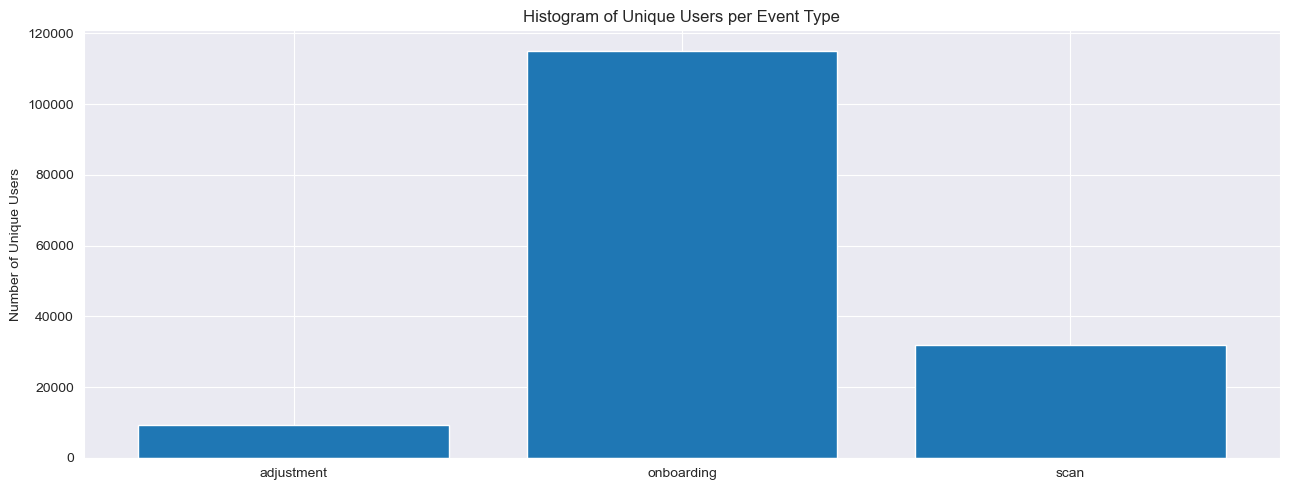

In [12]:
# Побудова графіку
plt.figure(figsize=(13, 5))
plt.bar(df_users_type['event_type'], df_users_type['unique_users'])
plt.ylabel('Number of Unique Users')
plt.title('Histogram of Unique Users per Event Type')
plt.tight_layout()  # Для покращення компактності графіку
plt.show()

З графіку можемо зробити висновок, що всі користувачі в датасеті пройшли онбординг, та що більшість користувачів використовує застосунок для сканування.

Користувачі які зробили 3 безкоштовні сканування.

In [13]:
# Викидаємо з датасету користувачів які є в базі платників
# Використовуємо pivot_table для підрахунку кількості кожного типу події для кожного user_id
event_counts = pd.pivot_table(df_app[~df_app['user_id'].isin(df_pay['user_id'].unique())], index='user_id', columns='event_type', aggfunc='size', fill_value=0)
# Додаємо умову вибору, щоб залишити лише ті рядки, де scan_count < 4
event_counts_filtered = event_counts[(event_counts['scan'] < 4) & (event_counts['scan'] > 0)]
event_counts_filtered.columns = ['adjustment_count', 'onboarding_count', 'scan_count']
event_counts_filtered
#event_counts[(event_counts['scan'] + (event_counts['adjustment'] <4) & (event_counts['scan'] + event_counts['adjustment']) > 0)].reset_index()

,adjustment_count,onboarding_count,scan_count
user_id,,,
scanner2#000284a7-19a8-4c00-8bce-fd997affeb5c,0,1,1
scanner2#00037c4e-5f94-4d5c-afbd-438cc773a2eb,0,1,1
scanner2#00066168-cf89-404d-b60f-4fec9a4c60c5,0,1,2
scanner2#00086dc7-3510-4022-b900-dbef76931c68,0,1,1
scanner2#000eb918-002b-4dbe-a968-e901076474cc,1,1,2
...,...,...,...
scanner2#fffa99fd-5ffe-4749-83a0-319272d2ed0b,0,1,2
scanner2#fffbce0e-189c-4a2e-be8d-117073d17ead,0,1,1
scanner2#fffc7d41-78f5-42ef-9d83-265e5beba99d,1,1,2


Юзери які зробили більше 3-х сканувань і яких немає в базі платників

In [14]:
# Датасет в якому юзери яких немає в базі платників
df_free = df_app[~df_app['user_id'].isin(df_pay['user_id'].unique())]
df_free = df_free.groupby(['user_id', 'event_type']).size().unstack(fill_value=0)
# датасет в якому користувачі які робили більше 3-х сканувань і при цьому їх нема в базі платників
df_bad_users = df_free[df_free['scan'] > 3].reset_index()
# кількість унікальних користувачі які робили більше 3-х сканувань і при цьому їх нема в базі платників
count_bad_users = df_bad_users.user_id.nunique()
df_bad_users

event_type,user_id,adjustment,onboarding,scan
0,scanner2#00225cec-cd37-4f69-8d4b-6fa1c8056c3f,3,1,6
1,scanner2#00562e13-7adf-42c8-b669-b245192c5d0a,0,1,4
2,scanner2#005684e2-944e-48eb-bcdd-b07ebfb851c7,0,1,4
3,scanner2#007f596a-bdf4-4d88-9468-70d08862c14e,5,1,6
4,scanner2#00801f2a-c219-4c68-870c-bd85451ad708,2,1,10
...,...,...,...,...
2182,scanner2#ff896f32-d676-4ded-93b4-e50205376576,2,1,10
2183,scanner2#ff96e6a8-fc15-49a5-803c-62cc7824b159,2,1,279
2184,scanner2#ffa574a2-ed97-4e57-9b0a-f324b4bc3167,0,1,4
2185,scanner2#ffd3be4f-79ad-4eb3-9563-02c925588108,1,1,7


Моя гіпотеза полягає в тому, що це юзери, які ввели всі дані для оплати, і почали використовувати преміум версію застосунку, до того часу коли мали знятись кошти.Але скоріш за все на карті було недостатньо коштів, тому користувач використовував премімум версію протягом цього часу безкоштовно :( 
Передивишись дані цих юзерів, серед них багато тих хто робив цю операцію повторно, тобто це люди яким потрібен цей застосунок і це потенційні клієнти.Або ж це люди які цим зловживають і не платять гроші.

### Другий етап.З'єднаємо два датасети, та будемо працювати з користувачами які є в базі платників та в базі івентів.

In [15]:
# Зробимо inner join датасетів df_pay та df_app 
df_full2 = df_app.merge(df_pay, on = 'user_id', how = 'inner')
df_full2

,user_id,event_type_x,event_time_x,event_type_y,event_time_y
0,scanner2#88c8fafe-fd39-4774-abb1-bd64c94d023c,onboarding,2022-11-29,took_trial,2022-11-29 09:14:58.125
1,scanner2#88c8fafe-fd39-4774-abb1-bd64c94d023c,onboarding,2022-11-29,cancelled_subscription,2022-12-01 06:09:59.817
2,scanner2#e0de5cdf-31cf-49b6-accf-26d6ee2fa7df,onboarding,2022-11-28,took_trial,2022-11-28 08:43:21.997
3,scanner2#e0de5cdf-31cf-49b6-accf-26d6ee2fa7df,onboarding,2022-11-28,cancelled_subscription,2022-11-28 08:44:30.462
4,scanner2#58666c56-107e-48bf-97be-e0db9a717f1d,onboarding,2022-11-16,took_trial,2022-11-16 12:27:45.275
...,...,...,...,...,...
172861,scanner2#d9072822-3b6a-4330-a9c6-3770b78d4637,onboarding,2022-11-22,took_trial,2022-11-22 00:53:16.801
172862,scanner2#007e9116-9352-481a-9c07-65d7434cfb5c,onboarding,2022-11-20,took_trial,2022-11-20 06:36:53.457
172863,scanner2#007e9116-9352-481a-9c07-65d7434cfb5c,onboarding,2022-11-20,cancelled_subscription,2022-11-20 06:38:27.889
172864,scanner2#e15c8e12-9374-4191-99e3-0a77ee144667,onboarding,2022-11-22,cancelled_subscription,2022-11-22 11:37:58.943


In [16]:
df_full2.user_id.nunique()

8298

In [17]:
num_of_scan_paid = df_full2.groupby(['user_id', 'event_type_x']).size().unstack(fill_value=0).reset_index()
sum_adjustment = num_of_scan_paid['adjustment'].sum()
sum_onboarding = num_of_scan_paid['onboarding'].sum()
sum_scan = num_of_scan_paid['scan'].sum()
sum_adjustment, sum_onboarding, sum_scan

(22827, 35410, 114629)

Percentage: 83.39%


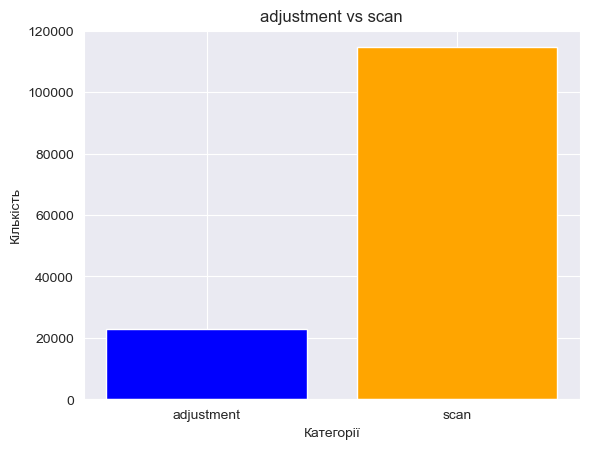

In [18]:
categories = ['adjustment', 'scan']
sum_values = [sum_adjustment, sum_scan]


percentage = sum_scan / (sum_adjustment + sum_scan) * 100
print(f'Percentage: {round(percentage,2 )}%')

# Побудова гістограми
plt.bar(categories, sum_values, color=['blue', 'orange'])

# Налаштування заголовка та міток осей
plt.title('adjustment vs scan')
plt.xlabel('Категорії')
plt.ylabel('Кількість');

Всі користувачі використовують сканування набагато частіше ніж редагування - 83.39%


### Буду обраховувати ревеню, розділив на 4 датасети : 
 ###### 1) Юзер платив та перестав та юзери що переставали платити але потім повертались
 ###### 2) Юзери які скасовували підписку після першої оплати і більше не повертались
 ###### 3) Юзери які не скасовували підписку і платять
 ###### 4) Юзери які використовували тільки trial версію, і зовсім не платили

In [19]:
max_date = df_pay['event_time'].max()
df4 = df_pay.groupby(['user_id', 'event_type'])['event_time'].agg(['min', 'max']).reset_index()
# Перетворення типу даних на date
df4['min'] = pd.to_datetime(df4['min'])
df4['max'] = pd.to_datetime(df4['max'])
df4.columns = ['user_id', 'event_type', 'min_dates', 'max_dates']
def func(x):
    if x == 'payment':
        return 1
    elif x == 'cancelled_subscription':
        return 2
    else :
        return 0
df4['RP'] = df4['event_type'].apply(func)
df4

,user_id,event_type,min_dates,max_dates,RP
0,scanner2#00076efd-13ee-40bb-9338-92dd6307606f,cancelled_subscription,2023-03-30 12:43:47.581,2023-03-30 12:43:47.581,2
1,scanner2#00076efd-13ee-40bb-9338-92dd6307606f,payment,2022-11-08 10:45:03.906,2023-03-28 09:43:43.621,1
2,scanner2#00076efd-13ee-40bb-9338-92dd6307606f,took_trial,2022-11-01 17:42:26.801,2022-11-01 17:42:26.801,0
3,scanner2#00167300-479e-4372-9c26-8031f0db0201,cancelled_subscription,2022-11-23 12:47:46.521,2022-11-23 12:47:46.521,2
4,scanner2#00167300-479e-4372-9c26-8031f0db0201,took_trial,2022-11-23 12:44:22.060,2022-11-23 12:44:22.060,0
...,...,...,...,...,...
17518,scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94,payment,2022-12-12 11:43:19.488,2022-12-12 11:43:19.488,1
17519,scanner2#ffe89bec-5a3f-4d7b-8440-02ec4ac32f94,took_trial,2022-11-30 16:26:08.583,2022-11-30 16:26:08.583,0
17520,scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47,cancelled_subscription,2022-11-19 01:28:38.065,2022-11-19 01:28:38.065,2
17521,scanner2#fffb227b-d7b4-4b31-b6e0-bd30893dab47,took_trial,2022-11-19 01:21:46.142,2022-11-19 01:21:46.142,0


Тут дістаємо потрібні дати, для took_trial, payment, cancelled_subscription

In [50]:
# Дата коли юзер взяв свій перший тріал
trial_dates = df4[(df4['event_type'] == 'took_trial')].groupby('user_id')['min_dates'].min()
trial_dates = trial_dates.reset_index()
trial_dates.columns = ['user_id', 'trial_min_dates']
trial_dates;

In [52]:
# Дата першої  і останньої оплат 
payment_dates = df4[(df4['event_type'] == 'payment')].groupby('user_id')[['min_dates', 'max_dates']].agg({'min_dates' : 'min',
                                                                                                          'max_dates' : 'max'})
payment_dates.columns = ['pay_min_dates', 'pay_max_dates']
payment_dates.reset_index();


In [22]:
# Дата першого останнього скасування підписки
cancelled_dates = df4[(df4['event_type'] == 'cancelled_subscription')].groupby('user_id')[['min_dates', 'max_dates']].agg({'min_dates': 'min', 'max_dates': 'max'})
#cancelled_dates[cancelled_dates['max_dates'] > cancelled_dates['min_dates']]
cancelled_dates = cancelled_dates.reset_index()
cancelled_dates.columns = ['user_id', 'cancel_min_dates', 'cancel_max_dates']
cancelled_dates;

In [54]:
# Кількість оплат, скасування та тріалів для кожного з користувачів
event_counts_pay = df_pay.groupby(['user_id', 'event_type']).size().unstack(fill_value=0)
event_counts_pay = event_counts_pay.reset_index()
event_counts_pay;

In [24]:
trial_period = pd.Timedelta(days=1) # брав шо тріал дійсний лише 1 день, за потреби можна змінити 
# максимальна дата коли було зроблено якусь оплату, відносно неї будемо рахувати всі показники
max_date = df_pay['event_time'].max()
max_date = pd.to_datetime(max_date)

Користувачі які платили і потім перестали та юзери які ще купляли підписку після скасування.

In [25]:
df_cancel_rev = df4.drop(['event_type'], axis = 1)
df_cancel_rev = df_cancel_rev.groupby(['user_id'])['RP'].sum()
df_cancel_rev = df_cancel_rev.reset_index() 
df_cancel_rev = df_cancel_rev.merge(cancelled_dates, on = 'user_id', how = 'inner')
df_cancel_rev = df_cancel_rev[(df_cancel_rev['RP'] == 3)] #
df_cancel_rev = df_cancel_rev.merge(payment_dates, on = 'user_id', how = 'inner')
df_cancel_rev = df_cancel_rev.merge(event_counts_pay, on = 'user_id', how = 'inner')
df_cancel_rev;

In [26]:
df_cancel_rev['cancel_max_dates'] = pd.to_datetime(df_cancel_rev['cancel_max_dates'])
df_cancel_rev['pay_max_dates'] = pd.to_datetime(df_cancel_rev['pay_max_dates'])
df_cancel_rev['revenue'] = 7 * df_cancel_rev['payment']

df_cancel_rev['revenue'] = df_cancel_rev.apply(lambda row: 7 * row['payment'] if row['cancel_max_dates'] > row['pay_max_dates'] else 7 * row['payment'] + math.ceil((max_date-row['pay_max_dates']).days/7)*7, axis=1)

# ------- Порахуємо ревеню для цієї категорії юзерів
rev_cancel = df_cancel_rev['revenue'].sum()
# ----- revenue per user цієї категорії юзерів
rvp_cancel= df_cancel_rev['revenue'].mean()
count_cancel = df_cancel_rev['user_id'].nunique()
rev_cancel, rvp_cancel, count_cancel


(64008, 31.177788602045787, 2053)

Юзери які скасовували підписку після першої оплати і більше не повертались

In [27]:
# юзери які скасували підписку один раз, і не платили ще після скасування
df_cancel_rev_tr = df4.drop(['event_type'], axis = 1)
df_cancel_rev_tr = df_cancel_rev_tr.groupby(['user_id'])['RP'].sum()
df_cancel_rev_tr = df_cancel_rev_tr.reset_index()
df_cancel_rev_tr = df_cancel_rev_tr[(df_cancel_rev_tr['RP'] == 2)] # 
df_cancel_rev_tr = df_cancel_rev_tr.merge(cancelled_dates, on = 'user_id', how = 'inner')
df_cancel_rev_tr = df_cancel_rev_tr.merge(trial_dates, on = 'user_id', how = 'inner')


df_cancel_rev_tr['cancel_min_dates'] = pd.to_datetime(df_cancel_rev_tr['cancel_min_dates'])
df_cancel_rev_tr['trial_min_dates'] = pd.to_datetime(df_cancel_rev_tr['trial_min_dates'])

# Розрахунок різниці між датами та конвертація у рядок
df_cancel_rev_tr['lifetime_days'] = (
        df_cancel_rev_tr['cancel_min_dates'] - 
        (df_cancel_rev_tr['trial_min_dates'] + trial_period)
).dt.days

df_cancel_rev_tr['revenue'] = df_cancel_rev_tr['lifetime_days'].apply(lambda days: math.ceil(days/7)*7 if days > 0 else 0)

# ------- Порахуємо ревеню для цієї категорії юзерів
rev_trial_cancel = df_cancel_rev_tr['revenue'].sum()
# ----- revenue per user цієї категорії юзерів
rvp_trial_cancel = df_cancel_rev_tr['revenue'].mean()
count_trial_cancel = df_cancel_rev_tr['user_id'].nunique()
rvp_trial_cancel, rev_trial_cancel, count_trial_cancel


(2.203895463510848, 8939, 4056)

Юзери які платять та не скасовували підписку

In [28]:
# юзери які не скасовували підписку
df_pay_rev = df4.drop(['event_type'], axis = 1)
df_pay_rev = df_pay_rev.groupby(['user_id'])['RP'].sum()
df_pay_rev = df_pay_rev.reset_index()
df_pay_rev = df_pay_rev.merge(payment_dates, on = 'user_id', how = 'inner')

df_pay_rev = df_pay_rev[df_pay_rev['RP'] == 1] # беремо лише тих юзерів які не скасовували підписку

df_pay_rev['pay_min_dates'] = pd.to_datetime(df_pay_rev['pay_min_dates'])
max_date = pd.to_datetime(max_date)
df_pay_rev['lifetime_days'] = (max_date - df_pay_rev['pay_min_dates']).dt.days
df_pay_rev['revenue'] = df_pay_rev['lifetime_days'].apply(lambda days: math.ceil(days/7)*7)
df_pay_rev.reset_index(drop=True)


# ------- Порахуємо ревеню для цієї категорії юзерів
rev_pay = df_pay_rev['revenue'].sum()
# ----- revenue per user цієї категорії юзерів
rvp_pay = df_pay_rev['revenue'].mean()
count_pay = df_pay_rev['user_id'].nunique()
rev_pay, rvp_pay, count_pay

(148015, 134.19310970081597, 1103)

Юзери які використовували тільки trial версію, і зовсім не платили

In [29]:
df_merged3 = pd.concat([df_cancel_rev, df_cancel_rev_tr, df_pay_rev])
not_only_trial = df_merged3['user_id'].unique()
df_trial_only = df_pay[~df_pay['user_id'].isin(not_only_trial)]
count_trial_only = df_trial_only.user_id.nunique()
count_trial_only

1086

## Metrics

In [30]:
# Створимо датасет який показуватиме показники для кожної з категорій
data = {
    'type_users': ['pay', 'cancelled_paid', 'cancelled_trial', 'trial_users'],
    'revenue': [rev_pay, rev_cancel, rev_trial_cancel, 0],
    'ARPPU': [rvp_pay, rvp_cancel, rvp_trial_cancel, 0],
    'count': [count_pay,  count_cancel, count_trial_cancel, count_trial_only]
}

# Створення датафрейму зі словника
df = pd.DataFrame(data)
df

,type_users,revenue,ARPPU,count
0,pay,148015,134.193110,1103
1,cancelled_paid,64008,31.177789,2053
2,cancelled_trial,8939,2.203895,4056
3,trial_users,0,0.000000,1086


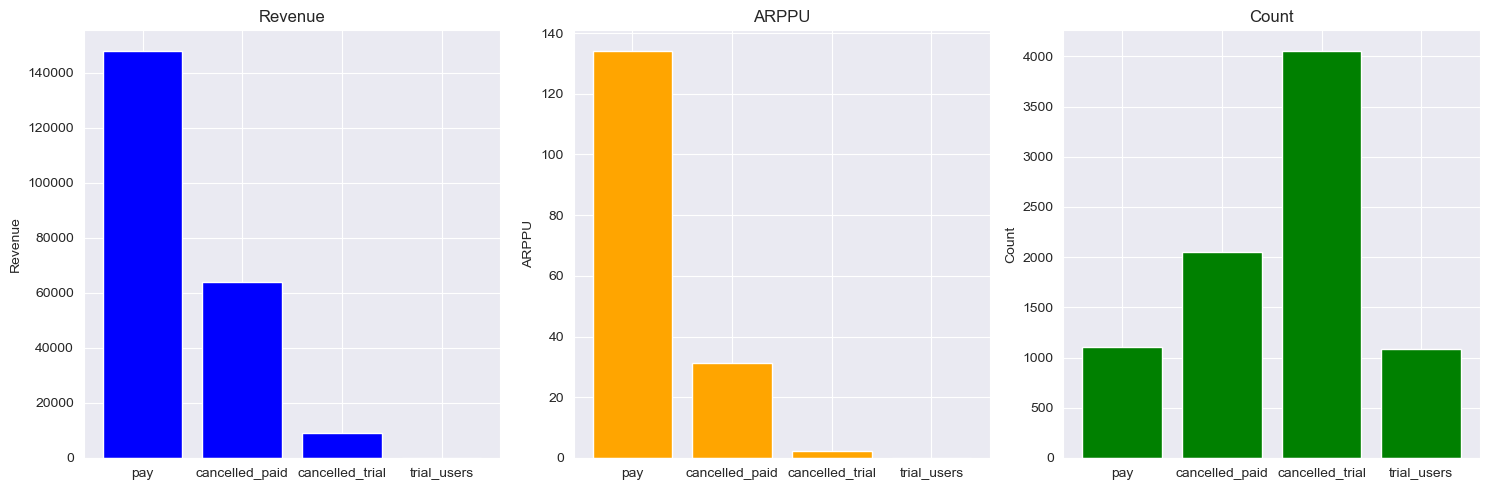

In [31]:
# Графік для revenue
plt.figure(figsize=(15,5))
plt.subplot(1, 3, 1)
plt.bar(df['type_users'], df['revenue'], color='blue')
plt.title('Revenue')
plt.ylabel('Revenue')

# Графік для ARPPU
plt.subplot(1, 3, 2)
plt.bar(df['type_users'], df['ARPPU'], color='orange')
plt.title('ARPPU')
plt.ylabel('ARPPU')

# Графік для count
plt.subplot(1, 3, 3)
plt.bar(df['type_users'], df['count'], color='green')
plt.title('Count')
plt.ylabel('Count')

# Показ графіків
plt.tight_layout()
plt.show()

Бачимо, що найбільший прибуток приносять юзери які платили і не скасовували підписку.
Проте найбільша кількість користувачів які скасовували тріал,а прибуток від них найменший відносно інших категорій (trial_users - не враховуємо)

Обчислимо метрики для Paid User (all)

In [32]:
#Датасет в якому будуть всі юзери які робили хоча б одну оплату

df_pay_trimmed = df_pay_rev[['user_id', 'RP', 'revenue']]
dt_cancel_rev_trimmed = df_cancel_rev_tr[['user_id', 'RP', 'revenue']]
df_cancel_rev_trimmed = df_cancel_rev[['user_id', 'RP', 'revenue']]

all_paid_users = pd.concat([df_pay_trimmed, dt_cancel_rev_trimmed, df_cancel_rev_trimmed], ignore_index=True)

def replace_RP(x):
    if x == 1 :
        return 'pay_user'
    elif x == 2 :
        return 'cancel_trial_user'
    else :
        return 'cancelled_user'


all_paid_users['RP'] = all_paid_users['RP'].apply(replace_RP)
all_paid_users

,user_id,RP,revenue
0,scanner2#003d66f7-e1bf-447d-bf8d-2909b578fe18,pay_user,154
1,scanner2#008feba6-62a1-4bb1-a4da-022e621267d4,pay_user,154
2,scanner2#01282a1c-5de9-46c1-a54b-895925f739c9,pay_user,119
3,scanner2#016ed9fc-1edb-4bfb-844f-9a3d322371ea,pay_user,147
4,scanner2#019334a5-9e8b-4c9d-85d0-dead855c4323,pay_user,126
...,...,...,...
7207,scanner2#ff6dd695-1459-4be5-ada5-793955862980,cancelled_user,7
7208,scanner2#ff7bebd5-22d0-4768-b198-b33a1948a6a9,cancelled_user,35
7209,scanner2#ff9967bb-2902-4640-ba5a-8c791b4dd3a5,cancelled_user,35
7210,scanner2#ffbcfeb5-7645-4f4f-818f-2516234c424b,cancelled_user,35


In [33]:
total_paid_users = all_paid_users['user_id'].nunique()
total_paid_users

7212

In [34]:
total_Revenue = all_paid_users['revenue'].sum()
total_Revenue

220962

In [35]:
total_ARRPU = all_paid_users['revenue'].mean()
total_ARRPU

30.63810316139767

In [36]:
ARPU = total_Revenue / df_app['user_id'].nunique()
ARPU

1.920123048046091

In [37]:
Conversion_Rate = total_paid_users / df_app['user_id'].nunique()*100
print(f'Conversion_Rate: {round(Conversion_Rate,2 )}%')

Conversion_Rate: 6.27%


In [38]:
# Датасет з діями які paid_users
df_app_paid_users = df_app[df_app['user_id'].isin(all_paid_users['user_id'].unique())]
df_app_paid_users = df_app_paid_users.reset_index(drop = True)
df_app_paid_users = df_app_paid_users[df_app_paid_users['event_type'].isin(['scan', 'adjustment'])].reset_index(drop = True)
df_app_paid_users['event_time'] = pd.to_datetime(df_app_paid_users['event_time']).dt.date
# кількість днів протягом якої юзер користувався додатком, (лише для paid users)
df_count_days = df_app_paid_users.groupby('event_time')['user_id'].nunique().reset_index()
df_count_days

,event_time,user_id
0,2022-11-01,163
1,2022-11-02,185
2,2022-11-03,234
3,2022-11-04,200
4,2022-11-05,119
...,...,...
164,2023-04-14,9
165,2023-04-15,8
166,2023-04-16,10
167,2023-04-17,16


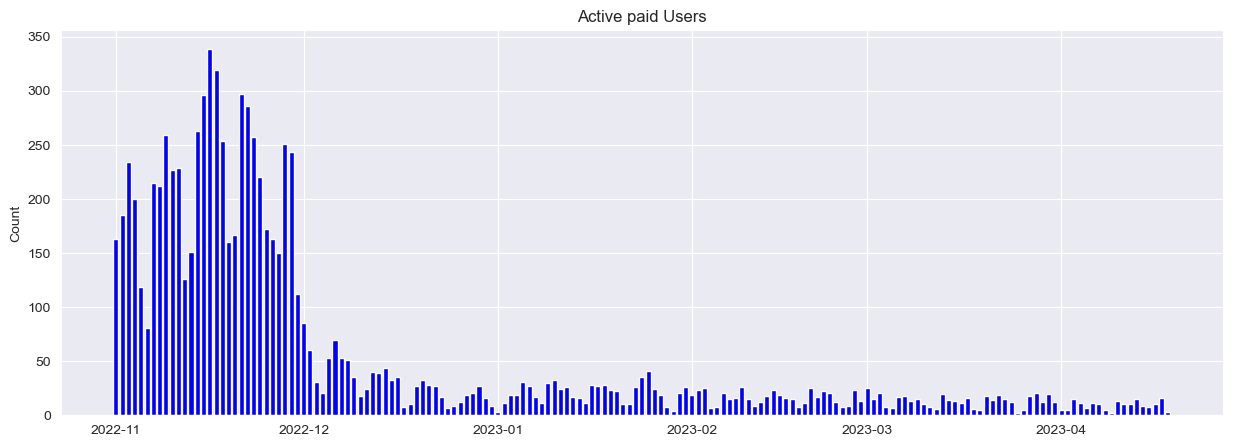

In [39]:
plt.figure(figsize=(15,5))
plt.bar(df_count_days['event_time'], df_count_days['user_id'], color='blue')
plt.title('Active paid Users')
plt.ylabel('Count');

З графіку вище видно, що найбільший пік користувачів був протягом першого місяця, а далі вже активність paid users спадає, і тримається на низькому рівні

In [44]:
# Датасет з діями які paid_users
df_app_paid_users = df_app[df_app['user_id'].isin(all_paid_users['user_id'].unique())]
df_app_paid_users = df_app_paid_users.reset_index(drop = True)
df_app_paid_users.user_id.nunique()
# Юзери які робили сканування або редагування хоча б 1 раз
df_app_paid_users_active = df_app_paid_users[df_app_paid_users['event_type'].isin(['scan', 'adjustment'])].reset_index(drop = True)
df_app_paid_users_active['event_time'] = pd.to_datetime(df_app_paid_users_active['event_time']).dt.date

event_type_count_users = df_app_paid_users_active.groupby('event_type')['user_id'].nunique().reset_index()

events_users_count = df_app_paid_users_active.groupby(['user_id', 'event_type']).size().unstack(fill_value=0).reset_index()

event_type_count_users

,event_type,user_id
0,adjustment,1853
1,scan,5548


In [41]:
# Юзери які не робили жодного сканування або редагування, але платили принаймні 1 раз
df_app_paid_users_unactive = df_app_paid_users[~df_app_paid_users['user_id'].isin(df_app_paid_users_active['user_id'])]
count_unactive = df_app_paid_users_unactive['user_id'].nunique()
count_unactive

1641

In [46]:
avg_scan_paid = events_users_count['scan'].mean() # without only trial users ЗАМІНИВ ТУТ events_paid_users на events_users_count
avg_scan_free = event_counts_filtered['scan_count'].mean()
avg_scan_paid, avg_scan_free

(3.3134087237479806, 1.3807169876203575)

Середня кількість сканувань серед юзерів які робили хоча б одну оплату значно вища ніж серед всіх користувачів.

Percentage: 80.67%


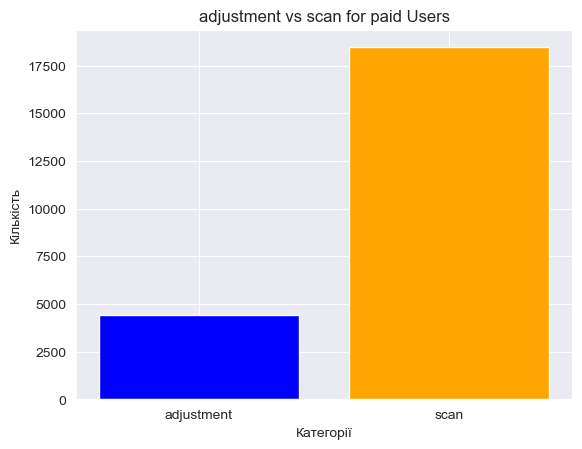

In [47]:
# ЗАМІНИТИ ТУТ events_paid_users на events_users_count
sum_adjustment_paid = events_paid_users['adjustment'].sum()
sum_scan_paid = events_paid_users['scan'].sum()
categories = ['adjustment', 'scan']
sum_values = [sum_adjustment_paid, sum_scan_paid]

percentage = sum_scan_paid / (sum_adjustment_paid + sum_scan_paid) * 100
print(f'Percentage: {round(percentage,2 )}%')

# Побудова гістограми
plt.bar(categories, sum_values, color=['blue', 'orange'])

# Налаштування заголовка та міток осей
plt.title('adjustment vs scan for paid Users')
plt.xlabel('Категорії')
plt.ylabel('Кількість')
plt.show()

Зберігається така ж тенденція як у випадку для всіх користувачів.
Платні користувачі в основному використовують сканування - 80.67%

adjustment: 20.49%
scan: 61.36%
unactive: 18.15%


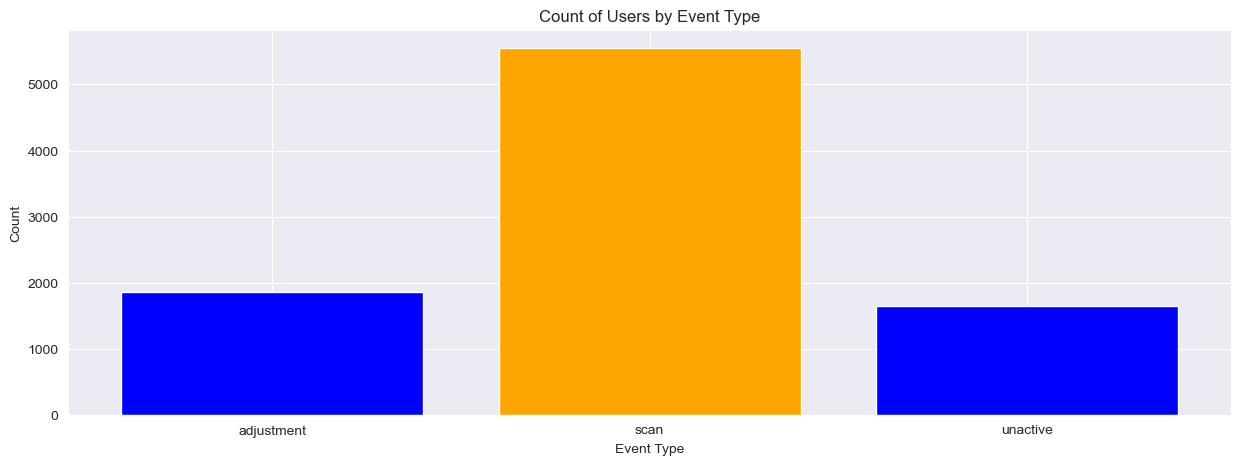

In [181]:
event_types = ['adjustment', 'scan', 'unactive']
user_ids = [1853, 5548, count_unactive]

for i, j in zip(user_ids, event_types):
    percentage = i / sum(user_ids) * 100
    print(f'{j}: {round(percentage,2 )}%')

# Побудова графіка
plt.figure(figsize=(15, 5))
plt.bar(event_types, user_ids, color=['blue', 'orange'])
plt.xlabel('Event Type')
plt.ylabel('Count')
plt.title('Count of Users by Event Type')
plt.show()

Кількість користувачів які хоча б один раз сканували документ - найбільша (61.36%) 
Але частка користувачів які не використовували функціонал та користувачі, що використовували редагування майже однакова 18.15% та 20.49% відповідно.